## Exploratory Data Analysis

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [65]:
df=pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [67]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [69]:
x=df['Loan_ID'].duplicated().sum()
print(f"There are {x} duplicate Loan IDs")

There are 0 duplicate Loan IDs


In [71]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [73]:
df.Property_Area.unique()	

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [75]:
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [77]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
x=df.isnull().sum().sum()
print(f"There are {x} null values in the dataset")

There are 149 null values in the dataset


In [81]:
df=df.drop(['Loan_ID'],axis=1)

**Filling null values**

In [84]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True);
df['Married'].fillna(df['Married'].mode()[0],inplace=True);
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True);
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True);
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True);
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True);
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True);


C:\Users\hp\AppData\Local\Temp\ipykernel_16064\3744504059.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True);
C:\Users\hp\AppData\Local\Temp\ipykernel_16064\3744504059.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [86]:
print(f"There are {df.isnull().sum().sum()} null values now.")


There are 0 null values now.


## Feature Engineering

In [89]:
df['Education']=df['Education'].astype(str).str.strip()
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})  
df['Loan_Status']=(df['Loan_Status']=='Y').astype(int)
df['Property_Area']=df['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2})
df['Self_Employed']=(df['Self_Employed']=='Yes').astype(int)
df['Married']=(df['Married']=='Yes').astype(int)
df['Gender']=(df['Gender']=='Male').astype(int)
df['Dependents']=df['Dependents'].replace({'3+':3}).astype(int)

In [91]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1


**Data Visualisation using Matplotlib and Seaborn**

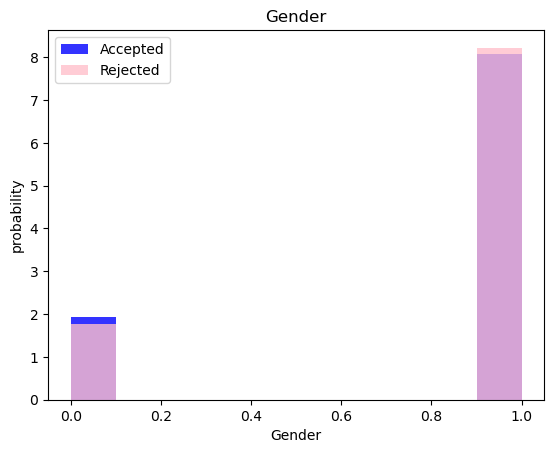

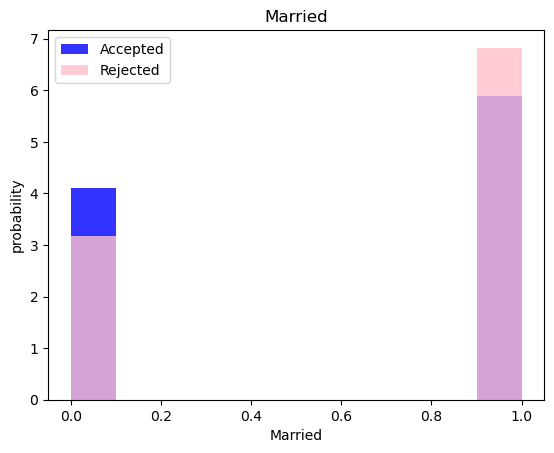

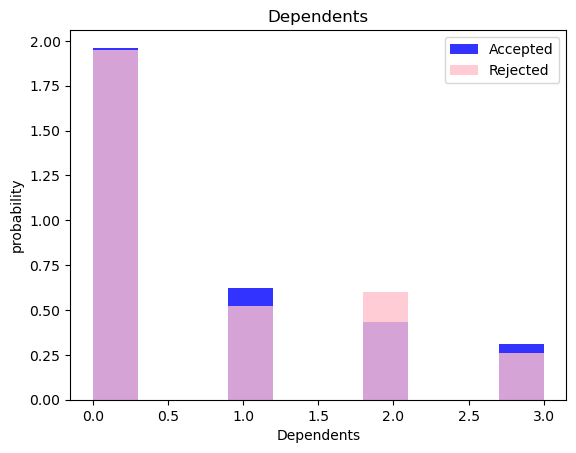

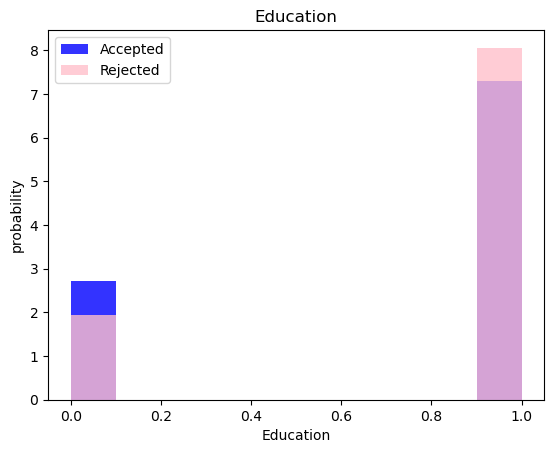

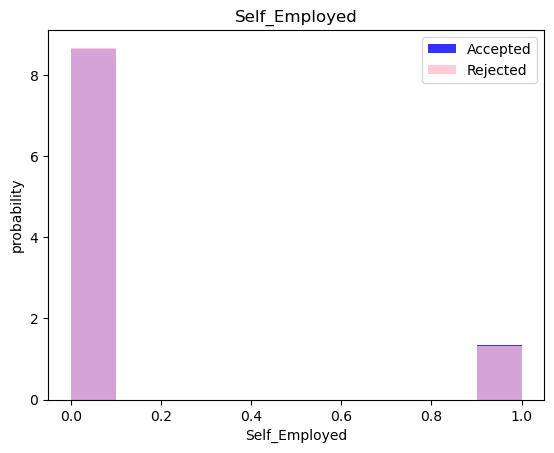

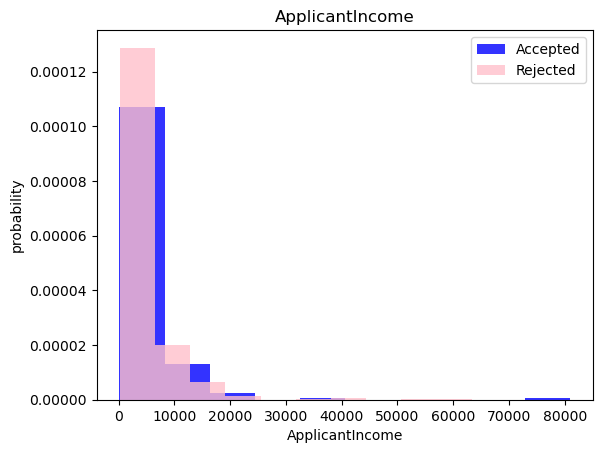

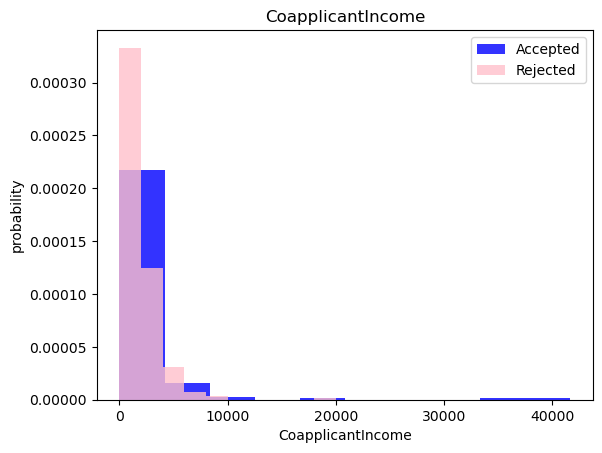

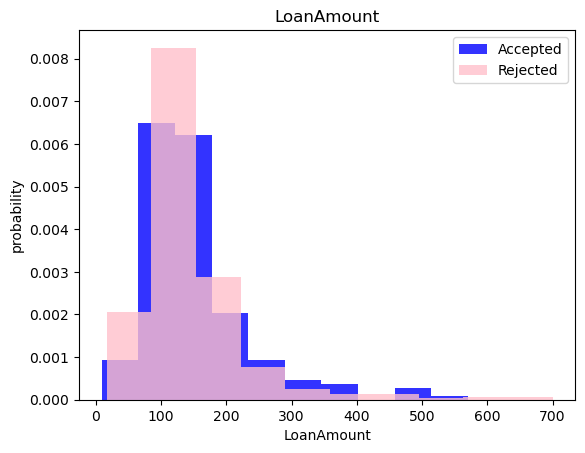

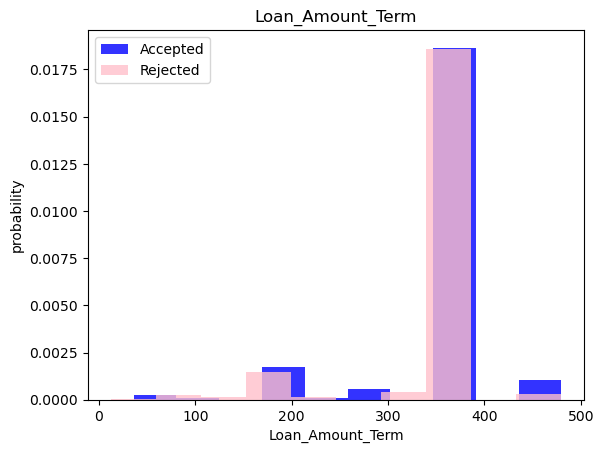

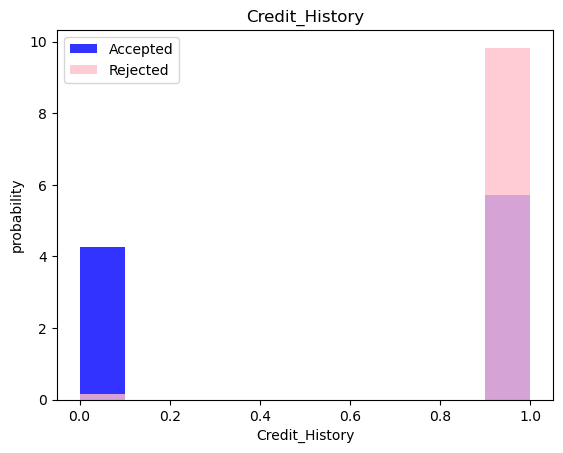

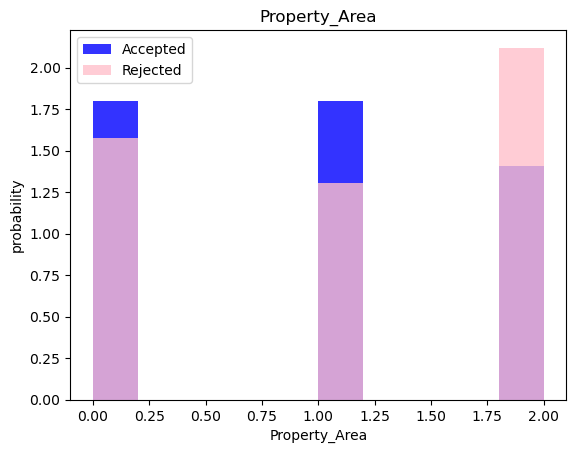

In [95]:
for label in df.columns[:-1]:
    plt.hist(df[df['Loan_Status']==0][label],density=True,alpha=0.8,color='blue',label='Accepted')
    plt.hist(df[df['Loan_Status']==1][label],density=True,alpha=0.8,color='pink',label='Rejected')
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("probability")
    plt.legend()
    plt.show()
    
    

**How many Loans were accepted?**

In [97]:
df[df['Loan_Status']==1].value_counts().sum()

422

**How many Loans were rejected?**

In [101]:
df[df['Loan_Status']==0].value_counts().sum()

192

**How many married people applied for the loans?**

In [104]:
df[df['Married']==1].value_counts().sum()

401

**How many married people's loan got accepted?**

In [107]:

x=df[(df['Married'] == 1) & (df['Loan_Status'] == 1)].shape[0]
print(x)

288


**How many unmarried people's loan got accepted?**

In [110]:
y=df[(df['Married']==0) & (df['Loan_Status'] == 1)].shape[0]
print(y)

134


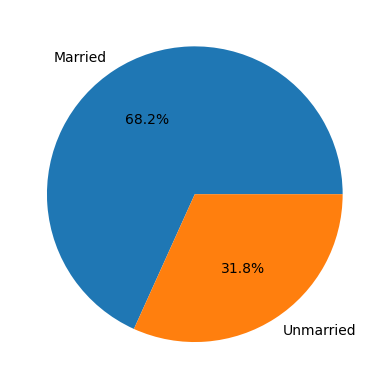

In [112]:
value=[x,y]
label=['Married','Unmarried']
plt.pie(value,labels=label,autopct='%0.1f%%');
plt.show()

**How many employed people's loan got accepted?**

In [115]:

#df[(df[])]

**How many people with dependents had their loan approved?**

In [118]:
df[(df['Dependents']!=0) & (df['Loan_Status']==1)].shape[0]

175

**Is there any difference in the loan status because of gender?**

In [121]:
T=df[df['Loan_Status']==1].groupby('Gender').size()
print(T) #according to the data there is a large difference

Gender
0     75
1    347
dtype: int64


**How many female and male got there loan approved and how many did not?**

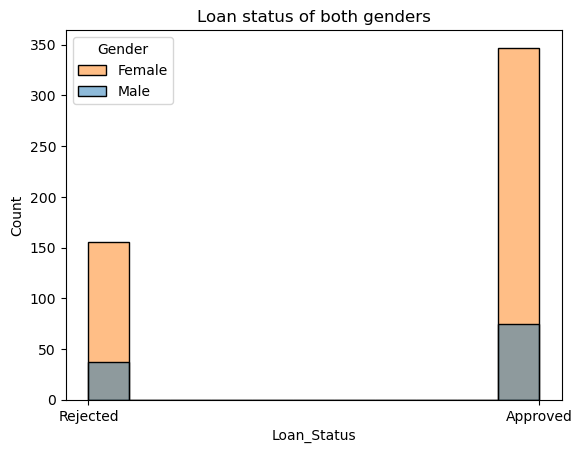

In [124]:
sns.histplot(data=df, x='Loan_Status', hue='Gender')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.xticks([0,1],['Rejected','Approved'])
plt.title("Loan status of both genders")
plt.show()

**What is the range of loan amount of approved loan?**

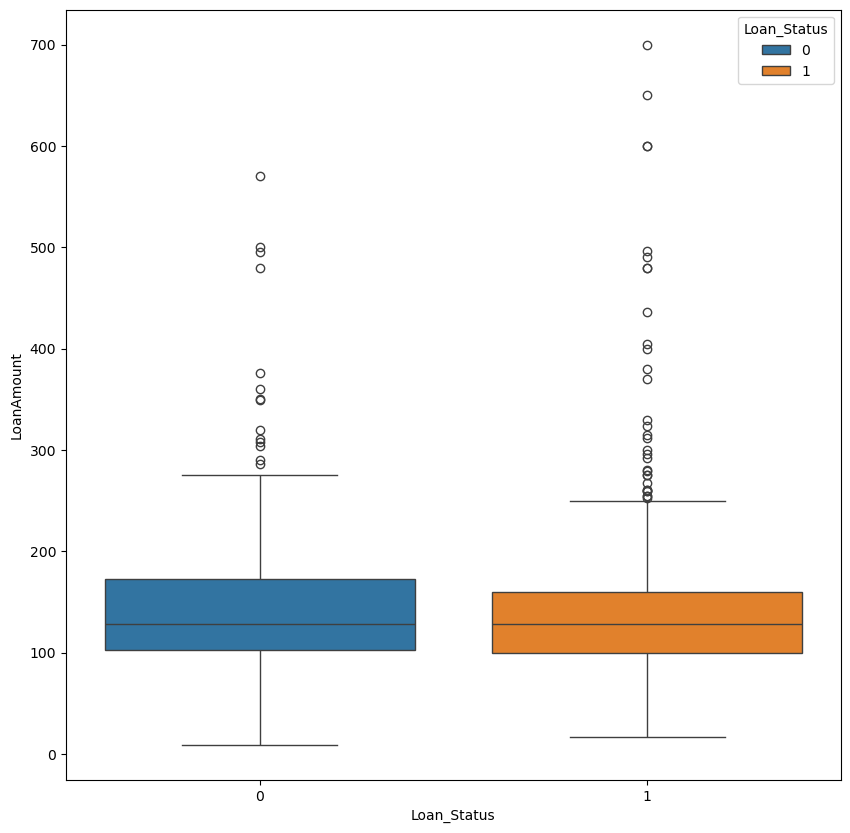

In [127]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Loan_Status',y='LoanAmount',hue='Loan_Status')
plt.show()

**Adding a new column in the dataset named as total income**

In [130]:
new_col=df['ApplicantIncome']+df['CoapplicantIncome']
df.insert(len(df.columns)-1,'Total_income',new_col.values)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,5849.0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,6091.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,3000.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,4941.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,6000.0,1


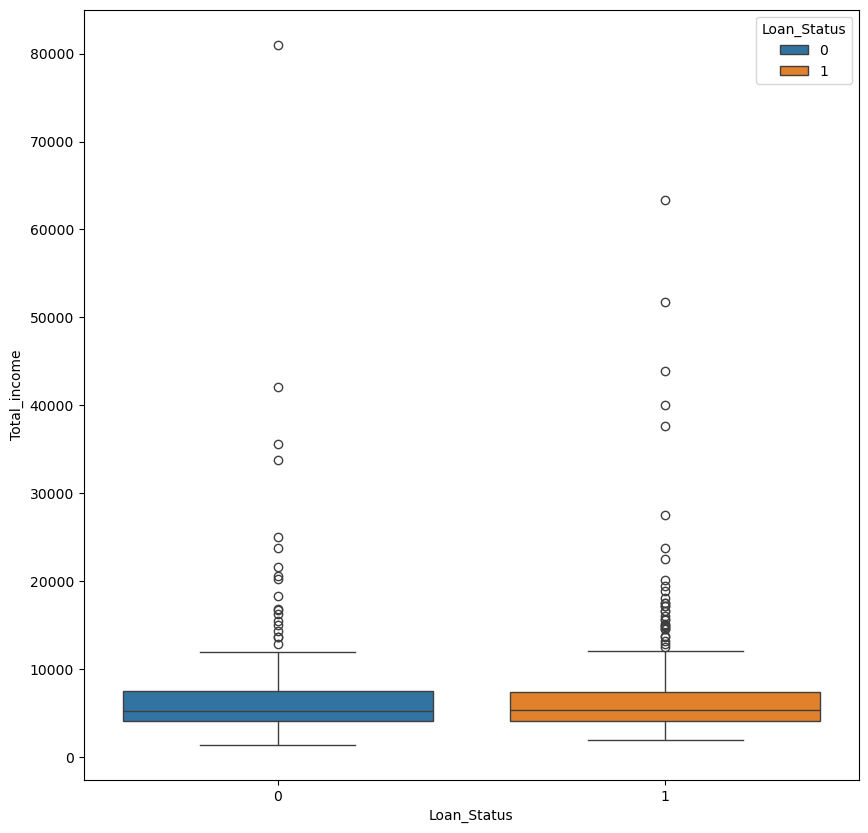

In [132]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Loan_Status',y='Total_income',hue='Loan_Status')
plt.show()

In [134]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.050489,7024.705081,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.840875,6458.663872,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,1442.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,4166.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,5416.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,7521.750000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,81000.000000,1.000000


**Loan amount vs Total income**

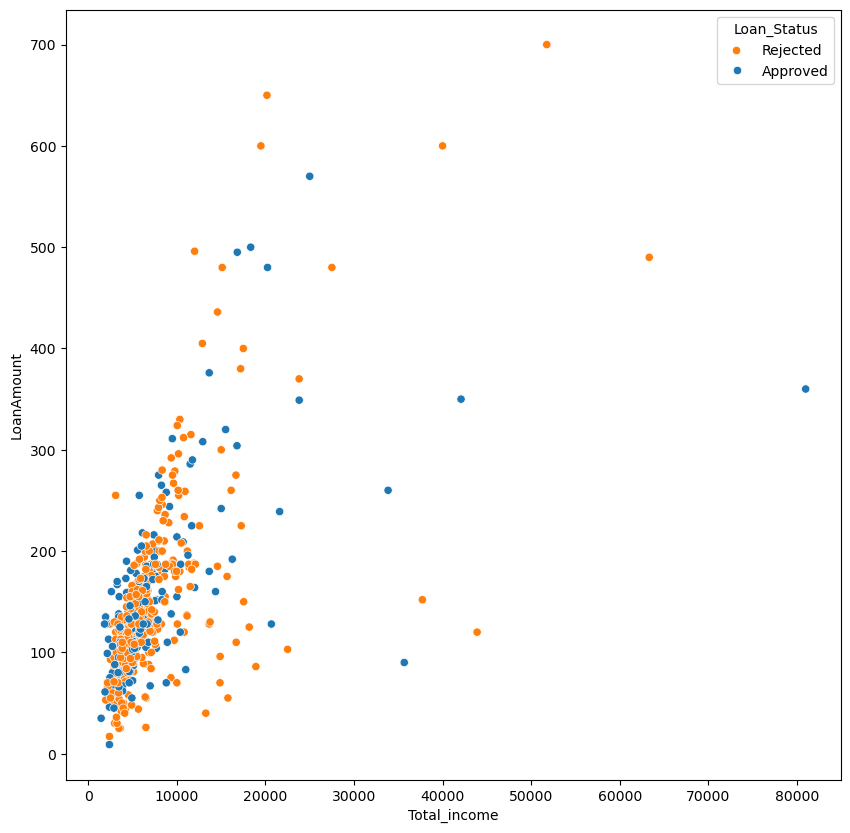

In [137]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='Total_income', y='LoanAmount', hue='Loan_Status')
plt.legend(title='Loan_Status',labels=['Rejected','Approved'])
plt.show()

**Splitting the data**

In [140]:
X=df.iloc[:,:11].values
Y=df.iloc[:,11].values

In [142]:
X

array([[  1.,   0.,   0., ..., 360.,   1.,   0.],
       [  1.,   1.,   1., ..., 360.,   1.,   1.],
       [  1.,   1.,   0., ..., 360.,   1.,   0.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   2., ..., 360.,   1.,   0.],
       [  0.,   0.,   0., ..., 360.,   0.,   2.]])

In [144]:
Y

array([ 5849.        ,  6091.        ,  3000.        ,  4941.        ,
        6000.        ,  9613.        ,  3849.        ,  5540.        ,
        5532.        , 23809.        ,  3900.        ,  4340.        ,
       11179.        ,  4693.        ,  2385.        ,  4950.        ,
        3596.        ,  3510.        ,  4887.        ,  6100.        ,
        7660.        , 11580.        ,  4511.        ,  5282.        ,
        6642.        ,  9560.        ,  5052.        ,  5266.        ,
        1442.        ,  5833.        ,  7535.        ,  3167.        ,
        4692.        ,  5167.        , 15500.        ,  4342.        ,
        3158.        ,  5126.        , 11376.        ,  5416.        ,
        3600.        ,  3013.        ,  2400.        ,  6277.        ,
        4695.        ,  3410.        ,  5649.        ,  5821.        ,
        6085.        ,  6275.        ,  3572.        ,  3086.        ,
        4230.        ,  4616.        , 11500.        ,  3875.        ,
      

In [146]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1,test_size=0.2)

**Scaling the data**

In [61]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit(X_test)